In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-asteroids-classification/nasa.csv
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2003-05-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2004-10-15.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2009-10-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2014-11-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file1996-12-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2009-10-15.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2014-09-15.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2006-06-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2008-03-08.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2012-08-22.json
/kaggle/input/nasa-asteroids-classification/Raw_Data_JSON/Raw_Data/file2009-0

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [45]:
import pandas as pd
data = pd.read_csv("/kaggle/input/nasa-asteroids-classification/nasa.csv")

In [46]:
data

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [47]:
data.shape

(4687, 40)

In [48]:
data.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

# CLASSIFICATION ALGORITHM

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
X = data.drop(['Hazardous'], axis=1)

y = data['Hazardous']

In [52]:
correlation_matrix = X.corrwith(y)
sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)
top_features = sorted_correlations.head(10)  
X_selected = X[top_features.index]
X = X_selected
print(X_selected.columns)

Index(['Orbit Uncertainity', 'Absolute Magnitude',
       'Minimum Orbit Intersection', 'Neo Reference ID', 'Name', 'Orbit ID',
       'Perihelion Distance', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour'],
      dtype='object')


/tmp/ipykernel_32/1246362766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corrwith(y)


In [53]:
X.dtypes

Orbit Uncertainity                int64
Absolute Magnitude              float64
Minimum Orbit Intersection      float64
Neo Reference ID                  int64
Name                              int64
Orbit ID                          int64
Perihelion Distance             float64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
dtype: object

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [55]:
X_train.head()

,Orbit Uncertainity,Absolute Magnitude,Minimum Orbit Intersection,Neo Reference ID,Name,Orbit ID,Perihelion Distance,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour
473,5,29.2,0.002387,3477703,3477703,6,0.512464,9.024491,32488.167996,20186.884164
2334,0,17.1,0.257022,2231134,2231134,128,0.995838,15.495321,55783.156095,34661.483853
1120,7,25.3,0.012109,3170208,3170208,7,0.624721,9.076817,32676.541086,20303.931877
4505,9,24.9,0.084004,3748362,3748362,4,0.899640,11.852144,42667.716919,26512.059993
4652,0,21.0,0.112305,2469929,2469929,22,1.015338,14.280592,51410.131855,31944.256651


In [56]:
y_train.head()

473     False
2334    False
1120    False
4505    False
4652    False
Name: Hazardous, dtype: bool

# STANDARDIZING THE FEATURES

In [57]:
column = cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[column])
X_test = pd.DataFrame(X_test, columns=[column])
X_train.head()

,Orbit Uncertainity,Absolute Magnitude,Minimum Orbit Intersection,Neo Reference ID,Name,Orbit ID,Perihelion Distance,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour
0,0.477658,2.424923,-0.888872,0.367432,0.367432,-0.572821,-1.239258,-0.674842,-0.674842,-0.674842
1,-1.151625,-1.807490,1.929463,-1.926752,-1.926752,2.600476,0.754953,0.209534,0.209534,0.209534
2,1.129372,1.060757,-0.781268,-0.198482,-0.198482,-0.546810,-0.776131,-0.667691,-0.667691,-0.667691
3,1.781085,0.920842,0.014477,0.865552,0.865552,-0.624842,0.358079,-0.288383,-0.288383,-0.288383
4,-1.151625,-0.443324,0.327718,-1.487274,-1.487274,-0.156651,0.835403,0.043516,0.043516,0.043516


# KNN - CLASSIFIER

In [58]:
from sklearn.neighbors import KNeighborsClassifier

## Determining the number of neighbours

In [59]:
n = int(math.sqrt(10))
print(n)

3


## Implementing KNN - Classifier

In [60]:
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_test_knn,y_pred_knn = y_test,y_pred
accuracy_model2 = accuracy_score(y_test, y_pred)
print(y_pred)

[False False False ...  True False False]


In [61]:
y_pred_prob = knn.predict_proba(X_test)[0:10]

In [62]:
accuracy_score(y_pred,y_test)

0.9388770433546553

In [63]:
y_test.value_counts()

False    1175
True      232
Name: Hazardous, dtype: int64

In [64]:
cm = confusion_matrix(y_test, y_pred)

TP,TN,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1128   47]
 [  39  193]]

True Positives(TP) =  1128

True Negatives(TN) =  193

False Positives(FP) =  47

False Negatives(FN) =  39


<Axes: >

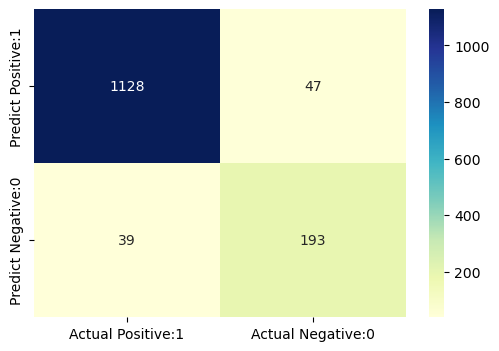

In [65]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification Report and Classification Accuracy

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.96      0.96      1175
        True       0.80      0.83      0.82       232

    accuracy                           0.94      1407
   macro avg       0.89      0.90      0.89      1407
weighted avg       0.94      0.94      0.94      1407



In [67]:
classification_accuracy = ka_svm = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
classification_error = ke_svm = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.9389
Classification error : 0.0611


In [68]:
from sklearn.metrics import roc_auc_score

ROC_AUC = a2 = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8959


# SVM CLASSIFIER

## SVM with Default Parameter

In [69]:
from sklearn.svm import SVC

svc=SVC() 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9595


## SVM Parameter c = 100

In [70]:
svc=SVC(C=100.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_test_svm,y_pred_svm = y_test,y_pred

accuracy_model1 = accuracy_score(y_test, y_pred)

print('Model accuracy score with C = 100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with C = 100.0 : 0.9723


## SVM with c = 100 and polynomial kernel 

In [71]:
svc1=SVC(kernel='poly', C=1000.0) 

svc1.fit(X_train, y_train)

y_pred1=svc1.predict(X_test)

print('Model accuracy score with polynomial kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score with polynomial kernel and C=100 : 0.9502


In [72]:
cm = confusion_matrix(y_test, y_pred)

TP,TN,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1153   22]
 [  17  215]]

True Positives(TP) =  1153

True Negatives(TN) =  215

False Positives(FP) =  22

False Negatives(FN) =  17


<Axes: >

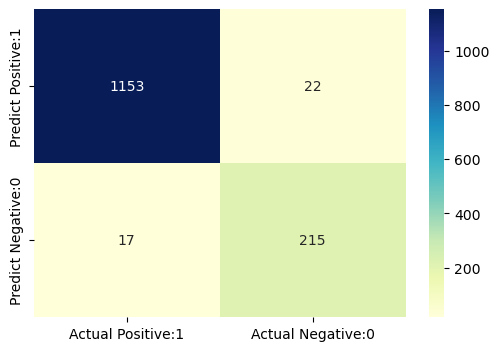

In [73]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification Reportand Classification Accuracy

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98      1175
        True       0.91      0.93      0.92       232

    accuracy                           0.97      1407
   macro avg       0.95      0.95      0.95      1407
weighted avg       0.97      0.97      0.97      1407



In [75]:
classification_accuracy = ca_svm = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
classification_error = ce_svm = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.9723
Classification error : 0.0277


In [76]:
from sklearn.metrics import roc_auc_score

ROC_AUC = a1 = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9540


# MODEL COMPARISION

## Confusion Matrix Comparision

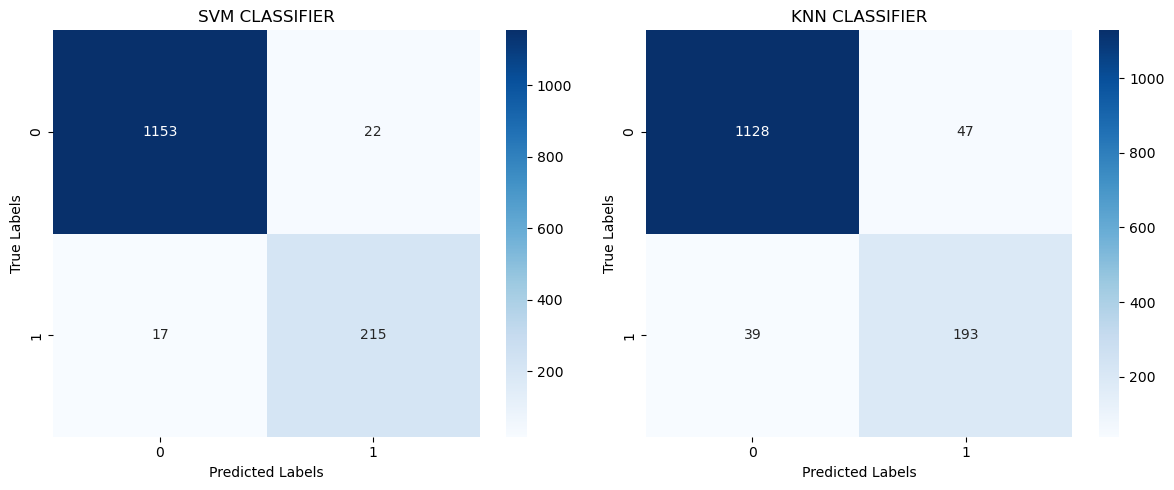

In [77]:
cm_1 = confusion_matrix(y_test_svm,y_pred_svm)

cm_2 = confusion_matrix(y_test_knn,y_pred_knn)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('SVM CLASSIFIER')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('KNN CLASSIFIER')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()

plt.show()


## Classification Report Comparision

In [78]:
from tabulate import tabulate

report_1 = classification_report(y_test_svm,y_pred_svm)

report_2 = classification_report(y_test_knn,y_pred_knn)

headers = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
rows_1 = [row.split() for row in report_1.split('\n')[2:-5]]
rows_2 = [row.split() for row in report_2.split('\n')[2:-5]]

# Add a prefix to differentiate the models
rows_1 = [['SVM CLASSIFIER'] + row for row in rows_1]
rows_2 = [['KNN CLASSIFIER'] + row for row in rows_2]

combined_rows = rows_1 + rows_2

print(tabulate(combined_rows, headers=headers, tablefmt='grid'))

+----------------+---------+-------------+----------+------------+-----------+
|                | Class   |   Precision |   Recall |   F1-Score |   Support |
+================+=========+=============+==========+============+===========+
| SVM CLASSIFIER | False   |        0.99 |     0.98 |       0.98 |      1175 |
+----------------+---------+-------------+----------+------------+-----------+
| SVM CLASSIFIER | True    |        0.91 |     0.93 |       0.92 |       232 |
+----------------+---------+-------------+----------+------------+-----------+
| KNN CLASSIFIER | False   |        0.97 |     0.96 |       0.96 |      1175 |
+----------------+---------+-------------+----------+------------+-----------+
| KNN CLASSIFIER | True    |        0.8  |     0.83 |       0.82 |       232 |
+----------------+---------+-------------+----------+------------+-----------+


## Accuracy Score Comparision

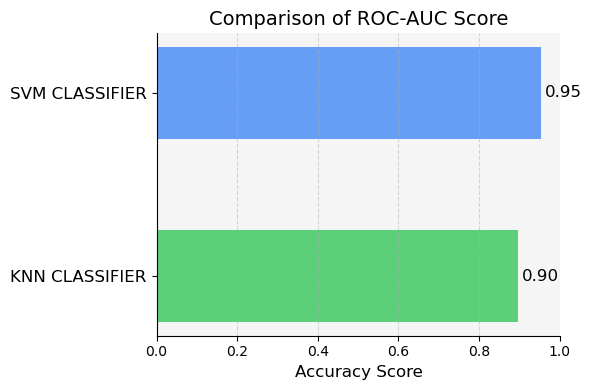

In [79]:
models = ['SVM CLASSIFIER', 'KNN CLASSIFIER']
accuracy_scores = [a1, a2]

bar_width = 0.5
bar_colors = ['#4287f5', '#34c759']


fig, ax = plt.subplots(figsize=(6, 4))
bar_positions = np.arange(len(models))

bars = ax.barh(bar_positions, accuracy_scores, height=bar_width, color=bar_colors, alpha=0.8)

ax.set_yticks(bar_positions)
ax.set_yticklabels(models, fontsize=12)
ax.invert_yaxis()
ax.set_xlabel('Accuracy Score', fontsize=12)
ax.set_title('Comparison of ROC-AUC Score', fontsize=14)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar_width / 2, f'{width:.2f}', va='center', fontsize=12)

# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Customize the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set a background color for the plot
ax.set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()

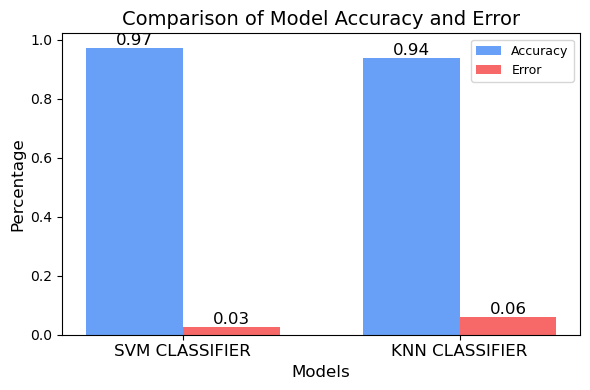

In [80]:
models = ['SVM CLASSIFIER', 'KNN CLASSIFIER']
accuracy_scores = [ca_svm,ka_svm]
error_values = [ce_svm, ke_svm]

bar_width = 0.35
bar_positions = np.arange(len(models))

fig, ax = plt.subplots(figsize=(6, 4))
bars1 = ax.bar(bar_positions - bar_width/2, accuracy_scores, width=bar_width, label='Accuracy', color='#4287f5', alpha=0.8)
bars2 = ax.bar(bar_positions + bar_width/2, error_values, width=bar_width, label='Error', color='#f54242', alpha=0.8)

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Comparison of Model Accuracy and Error', fontsize=14)
ax.set_xticks(bar_positions)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=9)

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Inference
 <font size="3">
    Here are the inferences from the classification results of the KNN and SVM classifiers for the asteroid classification dataset: </font>

### 1. Precision and Recall:
#### SVM Classifier:
<font size="3">
        For the "False" class (non-hazardous asteroids), the precision is 0.99, recall is 0.98, and F1-score is 0.98.For the "True" class (hazardous asteroids), the precision is 0.91, recall is 0.93, and F1-score is 0.92.</font>
#### KNN Classifier:
<font size="3">
       For the "False" class, the precision is 0.97, recall is 0.96, and F1-score is 0.96.For the "True" class, the precision is 0.8, recall is 0.83, and F1-score is 0.82.</font>

### 2.ROC AUC Score:
<font size="3">
        * SVM Classifier: The ROC AUC score is 0.95, indicating good performance in distinguishing between hazardous and non-hazardous asteroids.
        * KNN Classifier: The ROC AUC score is 0.90, suggesting a slightly lower performance compared to the SVM classifier.</font>

### 3. Classification Accuracy and Error:
<font size="3">
         * The SVM classifier had an accuracy of 0.97 and an error of 0.03, indicating a high overall accuracy.
         * The KNN classifier achieved an accuracy of 0.94 and an error of 0.06, suggesting slightly lower accuracy compared to the SVM classifier.
</font>
    

# CONCLUSION
<font size="3"><p>
            In this project, we undertook the classification of the asteroid dataset using the KNN and SVM classifiers to determine the hazardous nature of asteroids. After evaluating the performance of both models and analyzing the results, we have arrived at the following conclusions.</p>
         <p>   The SVM classifier demonstrated superior performance compared to the KNN classifier, exhibiting higher precision, recall, and F1-scores for both classes. The SVM model achieved a precision of 0.99 and recall of 0.98 for the "False" class, accurately classifying non-hazardous asteroids. For the "True" class, it achieved a precision of 0.91 and recall of 0.93, indicating its capability to identify hazardous asteroids, albeit with a slightly higher chance of misclassification. The KNN classifier performed reasonably well with a precision of 0.97 and recall of 0.96 for the "False" class, but had a lower precision of 0.80 and recall of 0.83 for the "True" class, suggesting a relatively higher likelihood of misclassification for hazardous asteroids.</p>
          <p>  Overall accuracy is an important metric for classification models, and the SVM model achieved an accuracy score of 97%, outperforming the KNN model's accuracy of 94%. This implies that the SVM model had a higher overall accuracy in classifying asteroids as hazardous or non-hazardous.</p>
          <p>  In conclusion, based on the evaluation and analysis of the results, the SVM classifier showed superior performance in classifying the asteroid dataset compared to the KNN classifier. It exhibited higher precision, recall, F1-scores, discriminatory power, accuracy, and lower classification error rate.</p> </font>